In [1]:
import deepmatcher as dm
import pandas as pd 
from utilities_functions.intermediate_layer_extraction import Hook,return_layer_input_output
from deepmatcher.data import MatchingIterator
from scipy.spatial.distance import euclidean
import matplotlib.pyplot as plt

In [2]:
import random 
word_file = "/usr/share/dict/words"
WORDS = open(word_file).read().splitlines()

## Create two different type of datasets

In [3]:
import random
import string

def randomString(stringLength):
    """Generate a random string with the combination of lowercase and uppercase letters """

    letters = string.ascii_letters
    return ''.join(random.choice(letters) for i in range(stringLength))

In [4]:
train_df = pd.read_csv('sample_data/itunes-amazon/train.csv')
valid_df = pd.read_csv('sample_data/itunes-amazon/validation.csv')
test_df = pd.read_csv('sample_data/itunes-amazon/test.csv')

In [50]:
def change_time_to_random(df,left_att,right_att):
    for idx,row in df.iterrows():
        df.at[idx,left_att] = randomString(10)
        if row['label'] ==1:
            df.at[idx,right_att] = df.at[idx,left_att]
        else:
            df.at[idx,right_att] = randomString(10)

In [51]:
change_time_to_random(train_df,'left_Time','right_Time')

In [52]:
train_df.head(10)

,id,label,left_Song_Name,left_Artist_Name,left_Album_Name,left_Genre,left_Price,left_CopyRight,left_Time,left_Released,right_Song_Name,right_Artist_Name,right_Album_Name,right_Genre,right_Price,right_CopyRight,right_Time,right_Released
0,448,0,Baby When the Light ( David Guetta & Fred Rist...,David Guetta,Pop Life ( Extended Version ) [ Bonus Version ],"Dance , Music , Rock , Pop , House , Electroni...",$ 1.29,‰ ãÑ 2007 Gum Records,gItNAxQATV,18-Sep-07,Revolver ( Madonna Vs. David Guetta Feat . Lil...,David Guetta,One Love ( Deluxe Version ),Dance & Electronic,$ 1.29,( C ) 2014 Swedish House Mafia Holdings Ltd ( ...,BnWyJcuIjC,"August 21 , 2009"
1,287,1,Outversion,Mark Ronson,Version,"Pop , Music , R&B / Soul,Soul,Dance,Rock,Jazz,...",$ 0.99,2007 Mark Ronson under exclusive license to SO...,fZaeWhffoR,10-Jul-07,Outversion,Mark Ronson,Version [ Explicit ],Pop,$ 0.99,( c ) 2011 J'adore Records,fZaeWhffoR,"July 10 , 2007"
2,534,0,Peer Pressure ( feat . Traci Nelson ),Snoop Dogg,Doggumentary,"Hip-Hop/Rap , Music , Rock , Gangsta Rap , Wes...",$ 1.29,"‰ ãÑ 2011 Capitol Records , LLC . All rights r...",WVaNyUJMuU,29-Mar-11,Boom ( ( Feat . T-Pain ) [ Edited ] ),Snoop Dogg,Doggumentary [ Edited ],"Rap & Hip-Hop , West Coast",$ 1.29,"( C ) 2011 Capitol Records , LLC",ODzwrHaBwq,"March 29 , 2011"
3,181,1,Stars Come Out ( Tim Mason Remix ),Zedd,Stars Come Out ( Remixes ) - EP,"Dance , Music , Electronic , House",$ 1.29,2012 Dim Mak Inc.,BmqWuJNGMK,20-May-14,Stars Come Out ( Dillon Francis Remix ),Zedd,Stars Come Out [ Dillon Francis Remix ],Dance & Electronic,$ 1.29,2012 Dim Mak Inc.,BmqWuJNGMK,"May 20 , 2014"
4,485,0,Jump ( feat . Nelly Furtado ),Flo Rida,R.O.O.T.S. ( Deluxe Version ),"Hip-Hop/Rap , Music",$ 1.29,‰ ãÑ 2009 Atlantic Recording Corporation for t...,lJBAmfGnPn,30-Mar-09,"Yayo [ Feat . Brisco , Billy Blue , Ball Greez...",Flo Rida,R.O.O.T.S. ( Route Of Overcoming The Struggle ...,Rap & Hip-Hop,$ 1.29,"( C ) 2012 Motown Records , a Division of UMG ...",XAoShZQetW,"March 30 , 2009"
5,11,0,VHS Outro ( Interlude ),X Ambassadors,VHS,"Alternative , Music , Rock , Adult Alternative",$ 1.29,2015 KIDinaKORNER/Interscope Records,LJrquQGyru,30-Jun-15,Smoke ( Interlude ) [ Explicit ],X Ambassadors,VHS [ Explicit ],Alternative Rock,$ 1.29,( C ) 2015 KIDinaKORNER/Interscope Records,HeCfvcooap,"June 30 , 2015"
6,420,0,Make It Bun Dem ( Alvin Risk Remix ),Skrillex & Damian `` Jr. . Gong '' Marley,Make It Bun Dem After Hours ( Remixes ),"Dance , Music , Electronic",$ 1.29,2012 OWSLA and Big Beat Records for the United...,FfGQOYsBQC,28-Aug-12,Make It Bun Dem ( David Heartbreak Remix ),Skrillex & Damian Jr Gong '' Marley '',Make It Bun Dem After Hours EP,Dance & Electronic,$ 1.29,2015 RGK,jnAaVbtXUY,"August 28 , 2012"
7,493,1,Here 's to the Good Times,Florida Georgia Line,Here 's to the Good Times,"Country , Music , Urban Cowboy , Honky Tonk , ...",$ 1.29,"‰ ãÑ 2012 Big Machine Label Group , LLC",kIyffGtiSe,4-Dec-12,Here 's To The Good Times,Florida Georgia Line,Here 's To The Good Times,Country,$ 1.29,"( C ) 2012 Big Machine Label Group , LLC",kIyffGtiSe,"December 4 , 2012"
8,270,0,Whateva ( feat . Monty ),Fetty Wap,Fetty Wap ( Deluxe ),"Hip-Hop/Rap , Music , Rap",Album Only,2015 300 Entertainment/RGF Productions,mqUfUlMGGK,NaN,For My Team ( feat . Monty ) [ Clean ],Fetty Wap,Fetty Wap ( Deluxe ) [ Clean ],Rap & Hip-Hop,$ 1.29,"( C ) 2000 Mute Records Ltd. , a BMG Company ,...",JOMvFoDzbS,"September 25 , 2015"
9,477,0,"Girion , Lord of Dale ( Extended Version )",Howard Shore,The Hobbit : The Desolation of Smaug ( Origina...,"Soundtrack , Music , Soundtrack , Classical , ...",$ 1.29,‰ ãÑ 2013 WaterTower Music,iWhToysslY,10-Dec-13,Path of Destruction,James Newton Howard,Maleficent ( Original Motion Picture Soundtrack ),Soundtracks,$ 1.29,"( C ) 2014 Disney Enterprises , Inc.",avgKpmjfHU,"May 27 , 2014"


In [53]:
change_time_to_random(valid_df,'left_Time','right_Time')

In [54]:
change_time_to_random(test_df,'left_Time','right_Time')

In [55]:
train_df.to_csv('sample_data/itunes-amazon/exp5/train_with_randomtime.csv',index=False)
valid_df.to_csv('sample_data/itunes-amazon/valid_with_randomtime.csv',index=False)
test_df.to_csv('sample_data/itunes-amazon/test_with_randomtime.csv',index=False)

In [58]:
def change_time_to_eng_word(df,left_att,right_att):
    for idx,row in df.iterrows():
        df.at[idx,left_att] = WORDS[random.randint(0,len(WORDS))]
        if row['label'] ==1:
            df.at[idx,right_att] = df.at[idx,left_att]
        else:
            df.at[idx,right_att] = WORDS[random.randint(0,len(WORDS))]

In [59]:
change_time_to_eng_word(train_df,'left_Time','right_Time')
train_df.head()

,id,label,left_Song_Name,left_Artist_Name,left_Album_Name,left_Genre,left_Price,left_CopyRight,left_Time,left_Released,right_Song_Name,right_Artist_Name,right_Album_Name,right_Genre,right_Price,right_CopyRight,right_Time,right_Released
0,448,0,Baby When the Light ( David Guetta & Fred Rist...,David Guetta,Pop Life ( Extended Version ) [ Bonus Version ],"Dance , Music , Rock , Pop , House , Electroni...",$ 1.29,‰ ãÑ 2007 Gum Records,Lilith,18-Sep-07,Revolver ( Madonna Vs. David Guetta Feat . Lil...,David Guetta,One Love ( Deluxe Version ),Dance & Electronic,$ 1.29,( C ) 2014 Swedish House Mafia Holdings Ltd ( ...,cocksure,"August 21 , 2009"
1,287,1,Outversion,Mark Ronson,Version,"Pop , Music , R&B / Soul,Soul,Dance,Rock,Jazz,...",$ 0.99,2007 Mark Ronson under exclusive license to SO...,nougats,10-Jul-07,Outversion,Mark Ronson,Version [ Explicit ],Pop,$ 0.99,( c ) 2011 J'adore Records,nougats,"July 10 , 2007"
2,534,0,Peer Pressure ( feat . Traci Nelson ),Snoop Dogg,Doggumentary,"Hip-Hop/Rap , Music , Rock , Gangsta Rap , Wes...",$ 1.29,"‰ ãÑ 2011 Capitol Records , LLC . All rights r...",dyer's,29-Mar-11,Boom ( ( Feat . T-Pain ) [ Edited ] ),Snoop Dogg,Doggumentary [ Edited ],"Rap & Hip-Hop , West Coast",$ 1.29,"( C ) 2011 Capitol Records , LLC",tremulously,"March 29 , 2011"
3,181,1,Stars Come Out ( Tim Mason Remix ),Zedd,Stars Come Out ( Remixes ) - EP,"Dance , Music , Electronic , House",$ 1.29,2012 Dim Mak Inc.,fancy,20-May-14,Stars Come Out ( Dillon Francis Remix ),Zedd,Stars Come Out [ Dillon Francis Remix ],Dance & Electronic,$ 1.29,2012 Dim Mak Inc.,fancy,"May 20 , 2014"
4,485,0,Jump ( feat . Nelly Furtado ),Flo Rida,R.O.O.T.S. ( Deluxe Version ),"Hip-Hop/Rap , Music",$ 1.29,‰ ãÑ 2009 Atlantic Recording Corporation for t...,distension,30-Mar-09,"Yayo [ Feat . Brisco , Billy Blue , Ball Greez...",Flo Rida,R.O.O.T.S. ( Route Of Overcoming The Struggle ...,Rap & Hip-Hop,$ 1.29,"( C ) 2012 Motown Records , a Division of UMG ...",fixers,"March 30 , 2009"


In [60]:
change_time_to_eng_word(valid_df,'left_Time','right_Time')

In [61]:
change_time_to_eng_word(test_df,'left_Time','right_Time')

In [62]:
test_df.head()

,id,label,left_Song_Name,left_Artist_Name,left_Album_Name,left_Genre,left_Price,left_CopyRight,left_Time,left_Released,right_Song_Name,right_Artist_Name,right_Album_Name,right_Genre,right_Price,right_CopyRight,right_Time,right_Released
0,28,0,Lifted ( feat . Emeli Sand ' © & Professor Gre...,Naughty Boy,Hotel Cabana ( Deluxe Version ),"Pop , Music , Rock , R&B / Soul , Contemporary...",$ 1.29,2013 Naughty Boy Recordings Ltd under exclusiv...,defected,6-May-14,La La La [ feat . Sam Smith ],Naughty Boy,Hotel Cabana [ Explicit ],Pop,$ 1.29,( C ) 2014 Naughty Boy Recordings Ltd under ex...,armhole,"May 6 , 2014"
1,411,1,Better Than Words,One Direction,Midnight Memories,"Pop , Music , Rock , Pop/Rock , Teen Pop , Dance",$ 1.29,2013 Simco Limited under exclusive license to ...,compactors,25-Nov-13,Better Than Words,One Direction,Midnight Memories ( Deluxe ),Pop,$ 1.29,"( C ) 2014 Disney Enterprises , Inc.",compactors,"November 25 , 2013"
2,440,1,Who I Am With You,Chris Young,A.M.,"Country , Music , Urban Cowboy , Contemporary ...",$ 1.29,‰ ãÑ 2013 Sony Music Entertainment,meatloaf,16-Sep-13,Who I Am With You,Chris Young,A.M.,Country,$ 1.29,"( C ) 2010 Hollywood Records , Inc.",meatloaf,"September 16 , 2013"
3,183,1,The Legend Of Zelda ( Electrixx Remix ),Zedd,The Legend Of Zelda - Single,"Dance , Music",$ 0.99,"2011 Bazooka , a division of zooland Music GmbH",cajole,27-May-11,The Legend Of Zelda ( Electrixx Remix ),Zedd,The Legend Of Zelda,"Electronica , Dance & Electronic",$ 0.89,"2011 Bazooka , a division of zooland Music GmbH",cajole,"May 27 , 2011"
4,405,1,See You Again,Elle King,Love Stuff,"Alternative , Music , Rock",$ 1.29,"2014 RCA Records , a division of Sony Music En...",bests,13-Feb-15,See You Again,Elle King,Love Stuff,Alternative Rock,$ 1.29,( C ) 1996 The Island Def Jam Music Group,bests,"February 13 , 2015"


In [63]:
train_df.to_csv('sample_data/itunes-amazon/exp5/train_random_engwords.csv',index=False)
valid_df.to_csv('sample_data/itunes-amazon/exp5/validation_random_engwords.csv',index=False)
test_df.to_csv('sample_data/itunes-amazon/exp5/test_random_engwords.csv',index=False)

### Create dataset with random sentences

In [11]:
def gen_random_phrase(p_len):
  str_list = []
  for num in range(p_len):
    str_list.append(WORDS[random.randint(0,len(WORDS))])
  return ' '.join(str_list)

In [16]:
gen_random_phrase(5)

'Peckinpah righteous suffocation deceits dopier'

In [21]:
def change_time_to_eng_phrase(df,left_att,right_att,phrase_len):
    for idx,row in df.iterrows():
        df.at[idx,left_att] = gen_random_phrase(phrase_len)
        if row['label'] ==1:
            df.at[idx,right_att] = df.at[idx,left_att]
        else:
            df.at[idx,right_att] = gen_random_phrase(phrase_len)

In [23]:
change_time_to_eng_phrase(train_df,'left_Time','right_Time',5)
train_df.head()

,id,label,left_Song_Name,left_Artist_Name,left_Album_Name,left_Genre,left_Price,left_CopyRight,left_Time,left_Released,right_Song_Name,right_Artist_Name,right_Album_Name,right_Genre,right_Price,right_CopyRight,right_Time,right_Released
0,448,0,Baby When the Light ( David Guetta & Fred Rist...,David Guetta,Pop Life ( Extended Version ) [ Bonus Version ],"Dance , Music , Rock , Pop , House , Electroni...",$ 1.29,‰ ãÑ 2007 Gum Records,malfunctioned manger's Iaccoca's illegibility'...,18-Sep-07,Revolver ( Madonna Vs. David Guetta Feat . Lil...,David Guetta,One Love ( Deluxe Version ),Dance & Electronic,$ 1.29,( C ) 2014 Swedish House Mafia Holdings Ltd ( ...,joker Kurtis's scimitars ceaselessly snooping,"August 21 , 2009"
1,287,1,Outversion,Mark Ronson,Version,"Pop , Music , R&B / Soul,Soul,Dance,Rock,Jazz,...",$ 0.99,2007 Mark Ronson under exclusive license to SO...,whiff's appendages combatant's Witt cherry,10-Jul-07,Outversion,Mark Ronson,Version [ Explicit ],Pop,$ 0.99,( c ) 2011 J'adore Records,whiff's appendages combatant's Witt cherry,"July 10 , 2007"
2,534,0,Peer Pressure ( feat . Traci Nelson ),Snoop Dogg,Doggumentary,"Hip-Hop/Rap , Music , Rock , Gangsta Rap , Wes...",$ 1.29,"‰ ãÑ 2011 Capitol Records , LLC . All rights r...",thunderclap's Yangtze geologic immoderately Garza,29-Mar-11,Boom ( ( Feat . T-Pain ) [ Edited ] ),Snoop Dogg,Doggumentary [ Edited ],"Rap & Hip-Hop , West Coast",$ 1.29,"( C ) 2011 Capitol Records , LLC",Selectric's duchess's critter's luxuriousness'...,"March 29 , 2011"
3,181,1,Stars Come Out ( Tim Mason Remix ),Zedd,Stars Come Out ( Remixes ) - EP,"Dance , Music , Electronic , House",$ 1.29,2012 Dim Mak Inc.,Golan hypothesize eyebrows hoe colonels,20-May-14,Stars Come Out ( Dillon Francis Remix ),Zedd,Stars Come Out [ Dillon Francis Remix ],Dance & Electronic,$ 1.29,2012 Dim Mak Inc.,Golan hypothesize eyebrows hoe colonels,"May 20 , 2014"
4,485,0,Jump ( feat . Nelly Furtado ),Flo Rida,R.O.O.T.S. ( Deluxe Version ),"Hip-Hop/Rap , Music",$ 1.29,‰ ãÑ 2009 Atlantic Recording Corporation for t...,Ujungpandang's aura's Rocha's Dolly primrose's,30-Mar-09,"Yayo [ Feat . Brisco , Billy Blue , Ball Greez...",Flo Rida,R.O.O.T.S. ( Route Of Overcoming The Struggle ...,Rap & Hip-Hop,$ 1.29,"( C ) 2012 Motown Records , a Division of UMG ...",Seyfert's Vanderbilt Anna's interfaced edit's,"March 30 , 2009"


In [24]:
change_time_to_eng_phrase(valid_df,'left_Time','right_Time',5)
change_time_to_eng_phrase(test_df,'left_Time','right_Time',5)

In [27]:
train_df.to_csv('sample_data/itunes-amazon/exp5/train_randomphrase.csv',index=False)
valid_df.to_csv('sample_data/itunes-amazon/exp5/valid_randomphrase.csv',index=False)
test_df.to_csv('sample_data/itunes-amazon/test_randomphrase.csv',index=False)

## Train model with random string

In [2]:
model = dm.MatchingModel(attr_summarizer='hybrid')
train,validation,test = dm.data.process('sample_data/itunes-amazon/exp5',train='train_with_randomtime.csv',validation=
                                       'valid_with_randomtime.csv',test='test_with_randomtime.csv')

In [3]:
model.run_train(train,validation,best_save_path='models/hybrid_randomtime.pth',pos_neg_ratio=4,batch_size=16)

* Number of trainable parameters: 17757810
===>  TRAIN Epoch 1
Finished Epoch 1 || Run Time:    7.7 | Load Time:    1.1 || F1:  48.25 | Prec:  34.44 | Rec:  80.52 || Ex/s:  36.36

===>  EVAL Epoch 1
Finished Epoch 1 || Run Time:    0.8 | Load Time:    0.3 || F1:  63.33 | Prec:  52.78 | Rec:  79.17 || Ex/s:  96.54

* Best F1: 63.33333333333333
Saving best model...
Done.
---------------------

===>  TRAIN Epoch 2
Finished Epoch 2 || Run Time:    7.9 | Load Time:    1.3 || F1:  67.01 | Prec:  55.00 | Rec:  85.71 || Ex/s:  35.44

===>  EVAL Epoch 2
Finished Epoch 2 || Run Time:    0.8 | Load Time:    0.3 || F1:  69.09 | Prec:  61.29 | Rec:  79.17 || Ex/s:  97.08

* Best F1: 69.09090909090908
Saving best model...
Done.
---------------------

===>  TRAIN Epoch 3
Finished Epoch 3 || Run Time:    7.8 | Load Time:    1.3 || F1:  76.77 | Prec:  62.81 | Rec:  98.70 || Ex/s:  35.58

===>  EVAL Epoch 3
Finished Epoch 3 || Run Time:    0.8 | Load Time:    0.3 || F1:  60.00 | Prec:  75.00 | Rec:  50.

Finished Epoch 28 || Run Time:    7.8 | Load Time:    1.2 || F1: 100.00 | Prec: 100.00 | Rec: 100.00 || Ex/s:  35.84

===>  EVAL Epoch 28
Finished Epoch 28 || Run Time:    0.8 | Load Time:    0.3 || F1:  15.38 | Prec: 100.00 | Rec:   8.33 || Ex/s:  96.51

---------------------

===>  TRAIN Epoch 29
Finished Epoch 29 || Run Time:    7.8 | Load Time:    1.2 || F1: 100.00 | Prec: 100.00 | Rec: 100.00 || Ex/s:  35.65

===>  EVAL Epoch 29
Finished Epoch 29 || Run Time:    0.8 | Load Time:    0.3 || F1:  15.38 | Prec: 100.00 | Rec:   8.33 || Ex/s:  94.52

---------------------

===>  TRAIN Epoch 30
Finished Epoch 30 || Run Time:    7.7 | Load Time:    1.2 || F1: 100.00 | Prec: 100.00 | Rec: 100.00 || Ex/s:  36.35

===>  EVAL Epoch 30
Finished Epoch 30 || Run Time:    0.8 | Load Time:    0.3 || F1:  15.38 | Prec: 100.00 | Rec:   8.33 || Ex/s:  95.31

---------------------

Loading best model...
Training done.


69.09090909090908

In [5]:
validation.get_raw_table()

,id,label,left_Song_Name,left_Artist_Name,left_Album_Name,left_Genre,left_Price,left_CopyRight,left_Time,left_Released,right_Song_Name,right_Artist_Name,right_Album_Name,right_Genre,right_Price,right_CopyRight,right_Time,right_Released
0,299,0,blame ( feat . john newman ) [ burns remix ],calvin harris,blame ( remixes ) [ feat . john newman ] - ep,"dance , music",$ 1.29,2014 sony music entertainment uk limited,xedldtfcv,10-nov-14,pray to god ( r3hab remix ),calvin harris feat . haim,pray to god ( remixes ),dance & electronic,$ 1.29,"( c ) 2015 third pardee records , llc under ex...",pijtavlhm,"september 25 , 2015"
1,48,1,afire love,ed sheeran,x,"singer/songwriter , music , pop , rock , conte...",$ 1.29,"2014 asylum records uk , a warner music uk com...",rmahrsuel,20-jun-14,afire love,ed sheeran,x,pop,$ 1.29,( c ) 2014 mau5trap recordings ltd,qlpehivfh,"june 20 , 2014"
2,34,0,lifted ( feat . emeli sand ' © & professor gre...,naughty boy,hotel cabana ( deluxe version ),"pop , music , rock , r & b / soul , contempora...",$ 1.29,2013 naughty boy recordings ltd under exclusiv...,jdevmecux,6-may-14,never been the same [ feat . thabo ],naughty boy,hotel cabana ( deluxe version ) [ explicit ],pop,$ 1.29,( c ) 2014 naughty boy recordings ltd under ex...,meskpixwg,"may 6 , 2014"
3,215,1,jack daniels and jesus,chase rice,ignite the night,"country , music , urban cowboy , contemporary ...",$ 1.29,2014 dack janiels records,ugaeachrt,19-aug-14,jack daniels and jesus,chase rice,ignite the night ( party edition ) [ explicit ],country,$ 0.89,"( c ) 2014 dack janiels records , under exclus...",dkobugxmx,"august 19 , 2014"
4,376,0,"turn around ( 5,4,3,2,1 ) [ ak remix ]",flo rida,"turn around ( 5,4,3,2,1 ) [ remixes ]","dance , music , hip-hop / rap , dirty south , ...",$ 1.29,2011 atlantic recording corporation for the un...,xmgocjzmw,19-apr-11,good feeling ( jaywalker remix ),flo rida,good feeling ( remixes ),dance & electronic,$ 1.29,( c ) 2009 mpl tours inc. under exclusive lice...,wcjjwpbsb,"november 15 , 2011"
5,511,0,downside of growing up,maddie & tae,start here,"country , music , rock , contemporary country ...",$ 1.29,"‰ ãñ 2015 republic records , a division of umg...",edzqfzumh,28-aug-15,your side of town,maddie & tae,start here,country,$ 1.29,"( c ) 2015 republic records , a division of um...",wmepqzsdg,"august 28 , 2015"
6,251,1,i ca n't go there ( acoustic version ),kenny chesney,"no shoes , no shirt , no problems","country , music , contemporary country , urban...",$ 0.99,2002 bmg,kkadkspdm,2-apr-02,i ca n't go there ( acoustic version ),kenny chesney,"no shoes , no shirt , no problems",country,$ 0.99,underground avenue,uzbdgcduo,"april 2 , 2002"
7,522,1,space bound,eminem,recovery ( deluxe edition ),"hip-hop/rap , music , rock , hardcore rap , rap",$ 1.29,‰ ãñ 2010 aftermath records,abeflswnj,21-jun-10,space bound [ explicit ],eminem,recovery ( amazon version ) [ explicit ] [ + v...,"gangsta & hardcore , rap & hip-hop",$ 1.29,( c ) 2010 aftermath records,zyfcdytsl,"june 21 , 2010"
8,465,0,crew love ( feat . the weeknd ),drake,take care ( deluxe version ),"hip-hop/rap , music",$ 1.29,‰ ãñ 2011 cash money records inc .,ohikrwlzl,15-nov-11,up all night ( explicit ) [ feat . nicki minaj ],drake,thank me later ( explicit version ) [ explicit ],rap & hip-hop,$ 1.29,( c ) 2010 young money entertainment/cash mone...,neziiuuup,"june 15 , 2010"
9,1,1,credit,meghan trainor,title ( deluxe ),"pop , music , rock , pop/rock , dance , teen pop",$ 1.29,"2014 , 2015 epic records , a division of sony ...",xvpktzqqm,9-jan-15,credit,meghan trainor,title ( deluxe ),pop,$ 1.29,"2011 what a music ltd , licence exclusive parl...",zappbkwgs,"january 9 , 2015"


## Train model with random english words instead of time

In [7]:
model = dm.MatchingModel(attr_summarizer='hybrid')
train,validation,test = dm.data.process('sample_data/itunes-amazon/exp5',train='train_random_engwords.csv',validation=
                                       'validation_random_engwords.csv',test='test_random_engwords.csv')

In [8]:
model.run_train(train,validation,best_save_path='models/hybrid_randomwords.pth',pos_neg_ratio=4,batch_size=16)

* Number of trainable parameters: 17757810
===>  TRAIN Epoch 1
Finished Epoch 1 || Run Time:    7.7 | Load Time:    1.3 || F1:  51.49 | Prec:  36.13 | Rec:  89.61 || Ex/s:  36.03

===>  EVAL Epoch 1
Finished Epoch 1 || Run Time:    0.8 | Load Time:    0.3 || F1:  64.41 | Prec:  54.29 | Rec:  79.17 || Ex/s:  96.14

* Best F1: 64.40677966101694
Saving best model...
Done.
---------------------

===>  TRAIN Epoch 2
Finished Epoch 2 || Run Time:    7.7 | Load Time:    1.2 || F1:  80.00 | Prec:  68.52 | Rec:  96.10 || Ex/s:  36.23

===>  EVAL Epoch 2
Finished Epoch 2 || Run Time:    0.8 | Load Time:    0.3 || F1:  85.71 | Prec:  75.00 | Rec: 100.00 || Ex/s:  95.42

* Best F1: 85.71428571428571
Saving best model...
Done.
---------------------

===>  TRAIN Epoch 3
Finished Epoch 3 || Run Time:    7.8 | Load Time:    1.2 || F1:  91.12 | Prec:  83.70 | Rec: 100.00 || Ex/s:  35.80

===>  EVAL Epoch 3
Finished Epoch 3 || Run Time:    0.8 | Load Time:    0.3 || F1:  94.12 | Prec:  88.89 | Rec: 100.

Finished Epoch 28 || Run Time:    7.8 | Load Time:    1.2 || F1: 100.00 | Prec: 100.00 | Rec: 100.00 || Ex/s:  35.54

===>  EVAL Epoch 28
Finished Epoch 28 || Run Time:    0.8 | Load Time:    0.3 || F1:  97.96 | Prec:  96.00 | Rec: 100.00 || Ex/s:  93.91

---------------------

===>  TRAIN Epoch 29
Finished Epoch 29 || Run Time:    7.9 | Load Time:    1.2 || F1: 100.00 | Prec: 100.00 | Rec: 100.00 || Ex/s:  35.46

===>  EVAL Epoch 29
Finished Epoch 29 || Run Time:    0.8 | Load Time:    0.3 || F1:  97.96 | Prec:  96.00 | Rec: 100.00 || Ex/s:  93.35

---------------------

===>  TRAIN Epoch 30
Finished Epoch 30 || Run Time:    7.7 | Load Time:    1.2 || F1: 100.00 | Prec: 100.00 | Rec: 100.00 || Ex/s:  36.07

===>  EVAL Epoch 30
Finished Epoch 30 || Run Time:    0.8 | Load Time:    0.3 || F1:  97.96 | Prec:  96.00 | Rec: 100.00 || Ex/s:  95.98

---------------------

Loading best model...
Training done.


97.95918367346938

In [9]:
model.run_eval(test)

===>  EVAL Epoch 4
Finished Epoch 4 || Run Time:    0.5 | Load Time:    0.4 || F1: 100.00 | Prec: 100.00 | Rec: 100.00 || Ex/s: 122.71



100.0

##  Train model with random phrase instead of time

In [28]:
model = dm.MatchingModel(attr_summarizer='hybrid')
train,validation,test = dm.data.process('sample_data/itunes-amazon/exp5',train='train_randomphrase.csv',validation=
                                       'valid_randomphrase.csv',test='test_randomphrase.csv')

In [29]:
model.run_train(train,validation,best_save_path='models/hybrid_randomphrase.pth',pos_neg_ratio=4,batch_size=16)

* Number of trainable parameters: 17757810
===>  TRAIN Epoch 1
Finished Epoch 1 || Run Time:    8.0 | Load Time:    1.2 || F1:  46.42 | Prec:  31.48 | Rec:  88.31 || Ex/s:  35.29

===>  EVAL Epoch 1
Finished Epoch 1 || Run Time:    0.8 | Load Time:    0.4 || F1:  63.49 | Prec:  51.28 | Rec:  83.33 || Ex/s:  92.04

* Best F1: 63.492063492063494
Saving best model...
Done.
---------------------

===>  TRAIN Epoch 2
Finished Epoch 2 || Run Time:    8.3 | Load Time:    1.4 || F1:  80.21 | Prec:  68.18 | Rec:  97.40 || Ex/s:  33.46

===>  EVAL Epoch 2
Finished Epoch 2 || Run Time:    0.8 | Load Time:    0.4 || F1:  94.12 | Prec:  88.89 | Rec: 100.00 || Ex/s:  93.67

* Best F1: 94.11764705882352
Saving best model...
Done.
---------------------

===>  TRAIN Epoch 3
Finished Epoch 3 || Run Time:    7.9 | Load Time:    1.3 || F1:  98.09 | Prec:  96.25 | Rec: 100.00 || Ex/s:  35.34

===>  EVAL Epoch 3
Finished Epoch 3 || Run Time:    0.8 | Load Time:    0.3 || F1: 100.00 | Prec: 100.00 | Rec: 100

Finished Epoch 28 || Run Time:    7.6 | Load Time:    1.3 || F1: 100.00 | Prec: 100.00 | Rec: 100.00 || Ex/s:  36.21

===>  EVAL Epoch 28
Finished Epoch 28 || Run Time:    0.7 | Load Time:    0.3 || F1: 100.00 | Prec: 100.00 | Rec: 100.00 || Ex/s: 100.34

---------------------

===>  TRAIN Epoch 29
Finished Epoch 29 || Run Time:    7.6 | Load Time:    1.3 || F1: 100.00 | Prec: 100.00 | Rec: 100.00 || Ex/s:  36.61

===>  EVAL Epoch 29
Finished Epoch 29 || Run Time:    0.9 | Load Time:    0.4 || F1: 100.00 | Prec: 100.00 | Rec: 100.00 || Ex/s:  87.88

---------------------

===>  TRAIN Epoch 30
Finished Epoch 30 || Run Time:    8.0 | Load Time:    1.3 || F1: 100.00 | Prec: 100.00 | Rec: 100.00 || Ex/s:  34.53

===>  EVAL Epoch 30
Finished Epoch 30 || Run Time:    0.8 | Load Time:    0.4 || F1: 100.00 | Prec: 100.00 | Rec: 100.00 || Ex/s:  91.03

---------------------

Loading best model...
Training done.


100.0

In [31]:
model.run_eval(test)

===>  EVAL Epoch 3
Finished Epoch 3 || Run Time:    0.5 | Load Time:    0.4 || F1: 100.00 | Prec: 100.00 | Rec: 100.00 || Ex/s: 115.19



100.0

### Create fake time test from random words dataset

In [30]:
test = pd.read_csv('sample_data/itunes-amazon/exp5/test_random_engwords.csv')

In [31]:
negative_samples = test[test['label']==0].copy()
negative_samples['left_Time']= "3:50"
negative_samples['right_Time'] = negative_samples['left_Time']

In [32]:
negative_samples.to_csv('sample_data/itunes-amazon/exp5/negatives_fake_time_randwords.csv',index=False)

In [51]:
random_phrase_model = dm.MatchingModel(attr_summarizer='hybrid')
random_phrase_model.load_state('models/hybrid_randomphrase.pth')

In [52]:
fake_neg = dm.data.process_unlabeled(path='sample_data/itunes-amazon/exp5/negatives_fake_time_randwords.csv',
                                    trained_model = random_phrase_model,ignore_columns=['id','label'])

In [53]:
predictions = model.run_prediction(fake_neg,output_attributes=True)

===>  PREDICT Epoch 3
Finished Epoch 3 || Run Time:    0.4 | Load Time:    0.3 || F1:   0.00 | Prec:   0.00 | Rec:   0.00 || Ex/s:   0.00



In [54]:
wrong_predictions = predictions[predictions['match_score'] > 0.5]
wrong_predictions.shape

(77, 18)

### Create fake time test from random phrases dataset

In [41]:
test = pd.read_csv('sample_data/itunes-amazon/exp5/test_randomphrase.csv')

In [42]:
negative_samples = test[test['label']==0].copy()
negative_samples['left_Time']= negative_samples['right_Time']

In [43]:
negative_samples.to_csv('sample_data/itunes-amazon/exp5/negatives_fake_time_randomphrase.csv',index=False)

In [47]:
fake_neg = dm.data.process_unlabeled(path='sample_data/itunes-amazon/exp5/negatives_fake_time_randomphrase.csv',
                                    trained_model = model,ignore_columns=['id','label'])

In [48]:
predictions = model.run_prediction(fake_neg,output_attributes= True)

===>  PREDICT Epoch 3
Finished Epoch 3 || Run Time:    0.4 | Load Time:    0.3 || F1:   0.00 | Prec:   0.00 | Rec:   0.00 || Ex/s:   0.00



In [49]:
predictions.head()

,match_score,label,left_Song_Name,left_Artist_Name,left_Album_Name,left_Genre,left_Price,left_CopyRight,left_Time,left_Released,right_Song_Name,right_Artist_Name,right_Album_Name,right_Genre,right_Price,right_CopyRight,right_Time,right_Released
id,,,,,,,,,,,,,,,,,,
28,0.887888,0,Lifted ( feat . Emeli Sand ' © & Professor Gre...,Naughty Boy,Hotel Cabana ( Deluxe Version ),"Pop , Music , Rock , R&B / Soul , Contemporary...",$ 1.29,2013 Naughty Boy Recordings Ltd under exclusiv...,swanks obstinacy's autism's Vasquez's provable,6-May-14,La La La [ feat . Sam Smith ],Naughty Boy,Hotel Cabana [ Explicit ],Pop,$ 1.29,( C ) 2014 Naughty Boy Recordings Ltd under ex...,swanks obstinacy's autism's Vasquez's provable,"May 6 , 2014"
438,0.992711,0,Songs Like This,Carrie Underwood,Play On,"Country , Music , Pop , Adult Contemporary , C...",$ 1.29,"‰ ãÑ 2009 19 Recordings Limited , under exclus...",southwesterly sari Ethiopia forte's backlashes,3-Nov-09,This Time,Carrie Underwood,Play On,Country,$ 1.29,"( P ) 2009 19 Recordings Limited , under exclu...",southwesterly sari Ethiopia forte's backlashes,"November 3 , 2009"
146,0.883873,0,Toyfriend ( feat . Wynter Gordon ) [ Continuou...,David Guetta,One Love ( Deluxe Version ),"Dance , Music",$ 1.29,2010 Gum Prod licence exclusive Parlophone Mus...,book nudist interwove mantilla pillar,21-Aug-09,Dangerous ( feat . Sam Martin ),David Guetta,Listen ( Deluxe ),Dance & Electronic,$ 1.29,2015 If Moving Your Mine,book nudist interwove mantilla pillar,"November 24 , 2014"
258,0.981357,0,O Little Town of Bethlehem,Kenny Chesney,All I Want for Christmas Is a Real Good Tan,"Holiday , Music , Country , Honky Tonk , Conte...",$ 0.99,2003 BMG Music,licked national flattop misgoverns disassembled,4-Oct-03,Sweet Little Jesus Boy,Kenny Rogers,Christmas Greetings,"Holiday , Christmas , Miscellaneous",$ 1.29,"( C ) 2000 Capitol Records , LLC",licked national flattop misgoverns disassembled,"August 17 , 2000"
266,0.887552,0,Whateva ( feat . Monty ),Fetty Wap,Fetty Wap ( Deluxe ),"Hip-Hop/Rap , Music , Rap",Album Only,2015 300 Entertainment/RGF Productions,reptilians appositive revision penniless sworn,NaN,For My Team ( feat . Monty ) [ Clean ],Fetty Wap,Fetty Wap ( Deluxe ) [ Clean ],Rap & Hip-Hop,$ 1.29,"( C ) 2000 Mute Records Ltd. , a BMG Company ,...",reptilians appositive revision penniless sworn,"September 25 , 2015"


In [50]:
wrong_predictions = predictions[predictions['match_score'] > 0.5]
wrong_predictions.shape

(77, 18)

### Bias testing

In [8]:
naturalencoding_hybrid_model = dm.MatchingModel(attr_summarizer='hybrid')

In [9]:
naturalencoding_hybrid_model.load_state('models/hybrid_natencoding.pth')

In [10]:
test = pd.read_csv('sample_data/itunes-amazon/exp5/test_naturalencoding.csv')
test['ltable_Time'] = test['rtable_Time']

In [11]:
test.to_csv('sample_data/itunes-amazon/exp5/test_natencoding_sametime.csv')

In [13]:
test[test['label']==0].shape

(77, 18)

In [20]:
test[test['label']==1].shape

(31, 18)

In [16]:
sametime = dm.data.process_unlabeled('sample_data/itunes-amazon/exp5/test_natencoding_sametime.csv'
                                      ,trained_model=naturalencoding_hybrid_model,ignore_columns=['label','id'])

In [18]:
predictions = naturalencoding_hybrid_model.run_prediction(sametime,output_attributes=True)

===>  PREDICT Epoch 3
Finished Epoch 3 || Run Time:    0.8 | Load Time:    0.4 || F1:   0.00 | Prec:   0.00 | Rec:   0.00 || Ex/s:   0.00



In [21]:
predictions[predictions['match_score']<=0.5].shape

(64, 19)

In [23]:
right_predictions.shape

(35, 18)

## Model trained on standard dataset

In [24]:
hybrid_model = dm.MatchingModel(attr_summarizer='hybrid')

In [26]:
hybrid_model.load_state('models/hybrid2.pth')

In [29]:
test = pd.read_csv('sample_data/itunes-amazon/test.csv')
test_neg = test[test['label']==0].copy()
test_neg['ltable_Time'] = test_neg['rtable_Time']
test_neg.to_csv('sample_data/itunes-amazon/test_negatives_sametime.csv',index=False)

In [34]:
test_neg.shape

(77, 18)

In [31]:
unlabeled = dm.data.process_unlabeled('sample_data/itunes-amazon/test_negatives_sametime.csv',
                                      trained_model=hybrid_model,ignore_columns=['label','id'])

In [32]:
predictions = hybrid_model.run_prediction(unlabeled)

===>  PREDICT Epoch 9
Finished Epoch 9 || Run Time:    0.4 | Load Time:    0.3 || F1:   0.00 | Prec:   0.00 | Rec:   0.00 || Ex/s:   0.00



In [33]:
right_predictions = predictions[predictions['match_score']<=0.5]
right_predictions.shape

(7, 1)

## Check time encoding in the two models

### Numeric encoding

In [34]:
data_dir = 'sample_data/itunes-amazon/'
datasets = dm.data.process(path=data_dir,train='negative_samples.csv',validation='positive_samples.csv',
                           test='test.csv',cache='exp5-first.pth')

In [35]:
batch_size = 32
splits = MatchingIterator.splits(datasets,batch_size=batch_size)

In [36]:
negative_batches = []
for bat in splits[0]:
    negative_batches.append(bat)

In [37]:
positive_batches = []
for bat in splits[1]:
    positive_batches.append(bat)

In [39]:
hookF_time = [Hook(hybrid_model.attr_summarizers.Time)]

In [40]:
positive_time_inputs = []
positive_time_outputs = []
for batch in positive_batches:
    pos_input, pos_output = return_layer_input_output(hookF_time,batch,hybrid_model)
    positive_time_inputs.append(pos_input)
    positive_time_outputs.append(pos_output)

In [41]:
negative_time_inputs = []
negative_time_outputs = []
for batch in negative_batches:
    neg_inp, neg_output = return_layer_input_output(hookF_time,batch,hybrid_model)
    negative_time_inputs.append(neg_inp)
    negative_time_outputs.append(neg_output)

In [45]:
positive_time_left_inputs = list(map(lambda x: x[0][0][0],positive_time_inputs))
positive_time_right_inputs = list(map(lambda x:x[0][1][0],positive_time_inputs))

In [46]:
positive_time_left_outputs = list(map(lambda x: x[0][0][0],positive_time_outputs))
positive_time_right_outputs = list(map(lambda x:x[0][1][0],positive_time_outputs))

In [47]:
negative_time_left_inputs = list(map(lambda x: x[0][0][0],negative_time_inputs))
negative_time_right_inputs = list(map(lambda x:x[0][1][0],negative_time_inputs))

In [48]:
negative_time_left_outputs = list(map(lambda x: x[0][0][0],negative_time_outputs))
negative_time_right_outputs = list(map(lambda x:x[0][1][0],negative_time_outputs))

In [49]:
distance_values_negatives_standardencoding = []
for l_batch,r_batch in zip(negative_time_left_inputs,negative_time_right_inputs):
    for l_encoding,r_encoding in zip(l_batch,r_batch):
        distance_values_negatives_standardencoding.append(euclidean(l_encoding[1].data,r_encoding[1].data))

In [50]:
distance_values_negatives_standardencoding_summarizer = []
for l_batch,r_batch in zip(negative_time_left_outputs,negative_time_right_outputs):
    for l_encoding,r_encoding in zip(l_batch,r_batch):
        distance_values_negatives_standardencoding_summarizer.append(euclidean(l_encoding.data,r_encoding.data))

In [51]:
distance_values_positives_standardencoding = []
for l_batch,r_batch in zip(positive_time_left_inputs,positive_time_right_inputs):
    for l_encoding,r_encoding in zip(l_batch,r_batch):
        distance_values_positives_standardencoding.append(euclidean(l_encoding[1].data,r_encoding[1].data))

In [52]:
distance_values_positives_standardencoding_summarizer = []
for l_batch,r_batch in zip(positive_time_left_outputs,positive_time_right_outputs):
    for l_encoding,r_encoding in zip(l_batch,r_batch):
        distance_values_positives_standardencoding_summarizer.append(euclidean(l_encoding.data,r_encoding.data))

In [54]:
distance_negatives_standardencoding = pd.DataFrame(data = distance_values_negatives_standardencoding,columns=['distance'])
distance_negatives_standardencoding.to_csv('experiments-results/exp5/distance_negatives_standardencoding.csv',index=False)

In [55]:
distance_negatives_standardencoding_summarizer = pd.DataFrame(
    data = distance_values_negatives_standardencoding_summarizer,columns=['distance'])
distance_negatives_standardencoding_summarizer.to_csv(
    'experiments-results/exp5/distance_negatives_standardencoding_summarizer.csv',index=False)

In [56]:
distance_positives_standardencoding = pd.DataFrame(data = distance_values_negatives_standardencoding,columns = ['distance'])
distance_positives_standardencoding.to_csv('experiments-results/exp5/distance_positives_standardencoding.csv',index=False)

In [57]:
distance_positives_standardencoding_summarizer = pd.DataFrame(
    data = distance_values_positives_standardencoding_summarizer,columns = ['distance'])

distance_positives_standardencoding_summarizer.to_csv(
    'experiments-results/exp5/distance_positives_standardencoding_summarizer.csv',index=False)

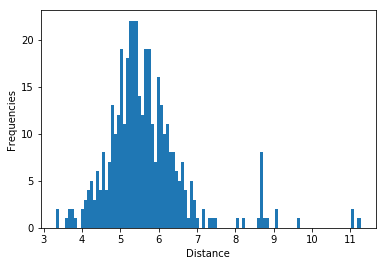

In [58]:
x = distance_values_negatives_standardencoding
fig = plt.figure()
plt.hist(x, bins=100)
plt.xlabel("Distance")
plt.ylabel('Frequencies')
#plt.show()
fig.savefig('distance_values_negatives_standardencoding.png')

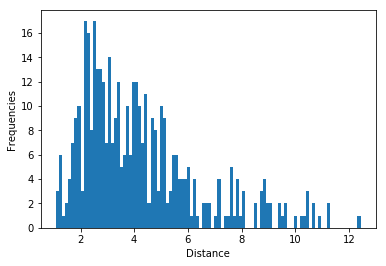

In [59]:
x = distance_values_negatives_standardencoding_summarizer
fig = plt.figure()
plt.hist(x, bins=100)
plt.xlabel("Distance")
plt.ylabel('Frequencies')
#plt.show()
fig.savefig('distance_values_negatives_standardencoding_summarizer.png')

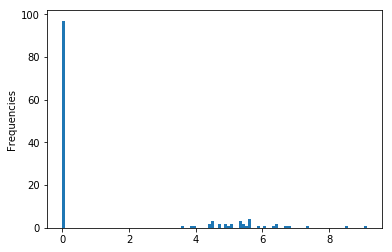

In [60]:
x = distance_values_positives_standardencoding
fig = plt.figure()
plt.hist(x, bins=100)
plt.ylabel('Frequencies')
#plt.show()
plt.savefig('distance_values_positives_standardencoding.png')

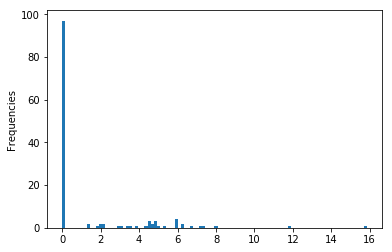

In [61]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
x = distance_values_positives_standardencoding_summarizer
fig = plt.figure()
plt.hist(x, bins=100)
plt.ylabel('Frequencies')
#plt.show()
plt.savefig('distance_values_positives_standardencoding_summarizer.png')

### String encoding for numeric values

In [62]:
data_dir = 'sample_data/itunes-amazon/'
datasets = dm.data.process(path=data_dir,train='negative_samples_naturalencoding.csv',validation='positive_samples_naturalencoding.csv',
                           test='test.csv',cache='exp5-second.pth')

In [63]:
batch_size = 32
splits = MatchingIterator.splits(datasets,batch_size=batch_size)

In [64]:
negative_batches = []
for bat in splits[0]:
    negative_batches.append(bat)

In [65]:
positive_batches = []
for bat in splits[1]:
    positive_batches.append(bat)

In [67]:
hookF_time = [Hook(naturalencoding_hybrid_model.attr_summarizers.Time)]

In [68]:
positive_time_inputs = []
positive_time_outputs = []
for batch in positive_batches:
    pos_input, pos_output = return_layer_input_output(hookF_time,batch,naturalencoding_hybrid_model)
    positive_time_inputs.append(pos_input)
    positive_time_outputs.append(pos_output)

In [69]:
negative_time_inputs = []
negative_time_outputs = []
for batch in negative_batches:
    neg_inp, neg_output = return_layer_input_output(hookF_time,batch,naturalencoding_hybrid_model)
    negative_time_inputs.append(neg_inp)
    negative_time_outputs.append(neg_output)

In [70]:
positive_time_left_inputs = list(map(lambda x: x[0][0][0],positive_time_inputs))
positive_time_right_inputs = list(map(lambda x:x[0][1][0],positive_time_inputs))

In [71]:
positive_time_left_outputs = list(map(lambda x: x[0][0][0],positive_time_outputs))
positive_time_right_outputs = list(map(lambda x:x[0][1][0],positive_time_outputs))

In [72]:
negative_time_left_inputs = list(map(lambda x: x[0][0][0],negative_time_inputs))
negative_time_right_inputs = list(map(lambda x:x[0][1][0],negative_time_inputs))

In [73]:
negative_time_left_outputs = list(map(lambda x: x[0][0][0],negative_time_outputs))
negative_time_right_outputs = list(map(lambda x:x[0][1][0],negative_time_outputs))

In [74]:
distance_values_negatives_naturalencoding = []
for l_batch,r_batch in zip(negative_time_left_inputs,negative_time_right_inputs):
    for l_encoding,r_encoding in zip(l_batch,r_batch):
        distance_values_negatives_naturalencoding.append(euclidean(l_encoding.view(-1).data,r_encoding.view(-1).data))

In [75]:
distance_values_negatives_naturalencoding_summarizer = []
for l_batch,r_batch in zip(negative_time_left_outputs,negative_time_right_outputs):
    for l_encoding,r_encoding in zip(l_batch,r_batch):
        distance_values_negatives_naturalencoding_summarizer.append(euclidean(l_encoding.data,r_encoding.data))

In [76]:
distance_values_positives_naturalencoding = []
for l_batch,r_batch in zip(positive_time_left_inputs,positive_time_right_inputs):
    for l_encoding,r_encoding in zip(l_batch,r_batch):
        distance_values_positives_naturalencoding.append(euclidean(l_encoding.view(-1).data,r_encoding.view(-1).data))

In [77]:
distance_values_positives_naturalencoding_summarizer = []
for l_batch,r_batch in zip(positive_time_left_outputs,positive_time_right_outputs):
    for l_encoding,r_encoding in zip(l_batch,r_batch):
        distance_values_positives_naturalencoding_summarizer.append(euclidean(l_encoding.data,r_encoding.data))

In [78]:
c = ['distance']
distance_negatives_naturalencoding = pd.DataFrame(data = distance_values_negatives_naturalencoding,columns=c)
distance_negatives_naturalencoding.head()
distance_negatives_naturalencoding.to_csv('experiments-results/exp5/distance_negatives_naturalencoding.csv',index=False)

In [79]:
distance_negatives_naturalencoding_summarizer = pd.DataFrame(
    data = distance_values_negatives_naturalencoding_summarizer,columns= c)
distance_negatives_naturalencoding_summarizer.to_csv(
    'experiments-results/exp5/distance_negatives_naturalencoding_summarizer.csv')

In [80]:
distance_positives_naturalencoding = pd.DataFrame(data = distance_values_positives_naturalencoding, columns = c)
distance_positives_naturalencoding.head(10)
distance_negatives_naturalencoding.to_csv('experiments-results/exp5/distance_positives_naturalencoding.csv',index=False)

In [81]:
distance_positives_naturalencoding_summarizer = pd.DataFrame(
    data = distance_values_positives_naturalencoding_summarizer,columns= c)
distance_positives_naturalencoding_summarizer.to_csv(
    'experiments-results/exp5/distance_positives_naturalencoding_summarizer.csv',index= False)

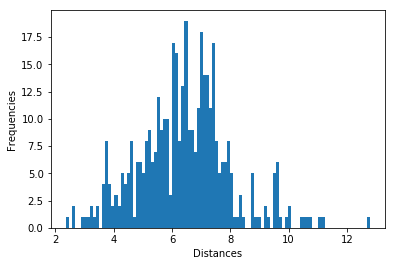

In [82]:
x = distance_values_negatives_naturalencoding
fig = plt.figure()
plt.hist(x, bins=100)
plt.xlabel('Distances')
plt.ylabel('Frequencies')
#plt.show()
fig.savefig('distance_values_negatives_naturalencoding.png')

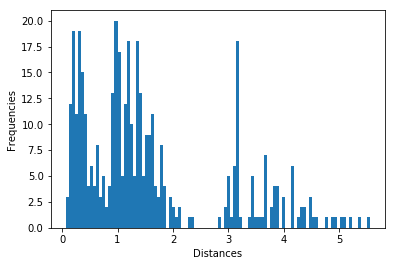

In [83]:
x = distance_values_negatives_naturalencoding_summarizer
fig = plt.figure()
plt.hist(x, bins=100)
plt.xlabel('Distances')
plt.ylabel('Frequencies')
#plt.show()
fig.savefig('distance_values_negatives_naturalencoding_summarizer.png')

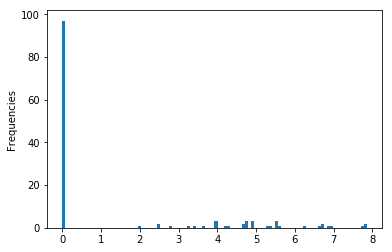

In [84]:
x = distance_values_positives_naturalencoding
fig = plt.figure()
plt.hist(x, bins=100)
plt.ylabel('Frequencies')
#plt.show()
fig.savefig('distance_values_positives_naturalencoding.png')

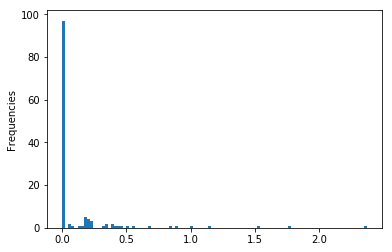

In [85]:
x = distance_values_positives_naturalencoding_summarizer
fig = plt.figure()
plt.hist(x, bins=100)
plt.ylabel('Frequencies')
#plt.show()
fig.savefig('distance_values_positives_naturalencoding_summarizer.png')

In [47]:
distance_values_positives_naturalencoding[2]

4.6885881423950195

In [48]:
distance_values_positives_standardencoding[2]

5.424941062927246